<a href="https://colab.research.google.com/github/HWANG-HOE-SUN/BigSound/blob/master/%EC%82%B0%EA%B3%B5%EB%8D%B0%EB%B6%84%EB%8C%80%ED%9A%8Cver1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install wordcloud

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlp
import numpy as np
from wordcloud import WordCloud

In [ ]:
import matplotlib.font_manager as fm

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

# konlpy환경설정

In [ ]:
!apt-get update 
!apt-get install g++ openjdk-8-jdk python-dev python3-dev 
!pip3 install JPype1-py3 
!pip3 install konlpy 
!JAVA_HOME="E:\jdk"

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu

In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Data = pd.read_excel('/content/drive/My Drive/2020산공데분대회/데이터셋/수도권평생학습/수도권평생학습.xlsx')

# 서울과 Not서울로 나누기

In [ ]:
Seoul = Data[Data['제공기관명'].str.contains('서울')]
Gyungi = Data.iloc[Seoul.index[-1]+1:]

In [ ]:
len(Data),len(Seoul),len(Gyungi)

(6963, 1474, 5489)

# 워딩

In [ ]:
# 논문 중심 키워딩
문화예술 = ['문화예술','예술','미술','레저','생활스포츠','수영','골프','밸리댄스','풍선','아트','사진','염색',
        '공예','노래','음악','무용','서예','관람','도자기','연극','영화'] 
인문교양 = ['인문교양','인문','교양','상담','종교','식생활','의료','의료','보건','역할','예절','정보','인터넷',
        '생활','가정','부모','문학','과학','역사','전통','철학','행복학','독서'] 
기초문해 = ['기초문해','문해','한글교실','한국어']
학력보완 = ['학력보완','학력','검정고시','학점']  
시민참여 = ['시민참여','인권','양성평등','다문화','주민자치','환경생태','지역리더','평생학습','상담자','NPO','지역문화',
        '자원봉사','환경실천'] 
직업교육 = ['직업교육','직업','창업','취업','자격증','자격인증','토익','토플','직무','연수','지도사'] 

In [ ]:
if '야' in (['아아','헤헤']) or '야' in ['엥']:
  print('굳')

In [ ]:
def to_cat(df):
  i=0
  result=[]
  while(i<len(df)):
    item_name = df.iloc[i].강좌명
    item_contents = df.iloc[i].강좌내용
    append_count = 0
    for c in range(len(기초문해)):
      if append_count==1:
        break
      if 기초문해[c] in item_name or 기초문해[c] in item_contents:
        result.append('기초문해')
        i+=1
        append_count+=1
        break
    for d in range(len(학력보완)):
      if append_count==1:
        break
      if 학력보완[d] in item_name or 학력보완[d] in item_contents:
        result.append('학력보완')
        i+=1
        append_count+=1
        break
    for e in range(len(시민참여)):
      if append_count==1:
        break
      if 시민참여[e] in item_name or 시민참여[e] in item_contents:
        result.append('시민참여')
        i+=1
        append_count+=1
        break
    for f in range(len(직업교육)):
      if append_count==1:
        break
      if 직업교육[f] in item_name or 직업교육[f] in item_contents:
        result.append('직업교육')
        i+=1
        append_count+=1
        break                          #break시 하위 반복문으로 들어감 append_count가 있어야 '네일컴퓨터교육' 이런게 중첩되서 append되지 않는다.
    for b in range(len(인문교양)):
      if append_count==1:
        break
      if 인문교양[b] in item_name or 인문교양[b] in item_contents:
        result.append('인문교양')
        i+=1
        append_count+=1
        break
    for a in range(len(문화예술)):
      if append_count==1:
        break
      if 문화예술[a] in item_name or 문화예술[a] in item_contents: #강좌명이나 내용에 위의 키워드가 포함되어 있다면 분류추가
        result.append('문화예술') 
        i+=1
        append_count+=1
        break   
    if append_count!=1:
      result.append('기타')
      append_count+=1
      i+=1
  return result

In [ ]:
Seoul['분류'] = to_cat(Seoul)
Gyungi['분류'] = to_cat(Gyungi)

In [ ]:
Seoul['분류'].value_counts(), Gyungi['분류'].value_counts()

(기타      841
 인문교양    265
 문화예술    257
 직업교육     43
 기초문해     30
 학력보완     23
 시민참여     15
 Name: 분류, dtype: int64, 기타      3641
 인문교양     657
 직업교육     563
 문화예술     536
 시민참여      49
 기초문해      38
 학력보완       5
 Name: 분류, dtype: int64)

# 분류결과 내보내기(논문 기준)

In [ ]:
My_Gyungi = Gyungi[Gyungi['분류']=='기타']
My_Gyungi.to_excel('my_gyungi.xlsx')

In [ ]:
My_Seoul = Seoul[Seoul['분류']=='기타']
My_Seoul.to_excel('my_data1.xlsx')

In [ ]:
# 분류 잘된거 내보내기
Good_Gyungi = Gyungi[Gyungi['분류']!='기타']
Good_Gyungi.to_excel('good_gyungi.xlsx')

In [ ]:
Seoul.to_excel('Seoul.xlsx') # 첫번쨰로 분류한 결과 내보내기(잘된거,안된거 다 포함)
Gyungi.to_excel('Gyungi.xlsx') # 첫번쨰로 분류한 결과 내보내기(잘된거,안된거 다 포함)

# konlpy 이용, 강좌명 처리

In [ ]:
Data.iloc[0]['강좌명']

'사진작품연구반'

In [ ]:
okt.nouns(Data.iloc[0]['강좌명'])

['사진', '작품', '연구', '반']

In [ ]:
for i in range(15):
  print(okt.nouns(My_Gyungi.iloc[i]['강좌명']))

['통기타', '야간']
['클래식기타']
['직장인', '위', '오피스', '야간']
['유튜브', '인', '방송']
['콘', '테츠', '크리에이터']
['엑셀', '파워포인트']
['나', '꽃', '선물', '야간']
['스', '피치', '리더십', '야간']
['수채화', '일러스트']
['소묘', '드로잉']
['캘리그라피']
['현대', '수묵', '담채화']
['홈', '패션']
['재봉틀', '기초', '홈웨어']
['중국어', '신', '대비']


#두번쨰 분류

In [ ]:
My_Gyungi = My_Gyungi.reset_index() # 인덱스 0부터로 재설정 해야함.

In [ ]:
My_Seoul = My_Seoul.reset_index()

In [ ]:
# 기타로 나온 항목에 대해, 추가 분류 작업.(예전에 워딩했던 키워드 응용)
new직업교육 = ['HSK','기능사','대비반','영어','일본어','외국어','번역','회화','문해','프리토킹','문법','한문'
,'엑셀','파워포인트','컴퓨터','인터넷','스마트폰','ITQ','복지사','자격','전산회계','네일리스트','심리학','심리통계',
'평생교육강사','실무','쉐프','직장인','실무','전문가','중국어','작가','관리사','코딩','PPT','C언어','자격','전직지원',
'플로리스트','행동교정사','바리스타']
new인문교양 = ['리더십','크리에이터','유튜브','구기','헬스','요가','필라테스','무용','에어로빅',
           '요리','음식','차','김치','샌드위치','떡','브런치','제과','제빵','베이커리','베이킹',
           '케이크','고추장','한식','양식','가정식','디저트','건강식','약초','슬로푸드','운동',
           '지도방법','맥주','훌라','동양고전','마사지','물리학','논어','테니스','그릇','스트레칭',
           '과일','근력','다이어트','건강','게이트볼','국선도','고려수지침','명심보감','단전호흡','간식',
           '한복','전산회계','피부','반찬','근현대사','명상','스피치','북트레일러','심리','식습관',
           '킥복싱','삼국시대','책놀이','암산','주산','체조','워킹','수어','마케팅','세계사','슬로우리딩',
           '커뮤니케이션','니체','수납정리','글쓰기','가짜뉴스','추리','약용식물','에세이','진로','수학여행',
           '산책','북바인딩','체조','신화','체형','환경보호','안전교육','소통','스포츠','줌바','행정법률','경제',
           '양육','고사성어','비누','와인','공모전','탁구','채소','보험','이유식','레시피','카페','글쓰기','헤어',
           '피부','인성','시','세계사','수화','명화','명상','상식','커뮤니케이션','사마천','블로그','미용','머리','초콜릿',
           '파스타','리조또','옷','태극권','재무','한국사','빵','푸드','간식','호신술','정리','발레','의류','산책','니체',
           '관상학','커피']
new문화예술 = ['미술','일러스트','수채화','기타','드럼','해금','하모니카','오카리나','색소폰','플루트','드로잉','pop','캘리그라피','합창',
       '가곡','가요','민요','서양화','수묵화','소묘','그리기','스케치','손글씨','캐리커쳐','노래','댄스','풍물','아트','오케스트라',
       '뮤지컬','바이올린','우쿨렐레','도자기','인물화','악기','서예','페인팅','포토','사군자','꽃','공예','DIY','목공','섬유','의상','꽃꽂이',
       '화훼','도예','자수','퀼트','보컬','가죽소품','카메라','춤','성악','우크렐레','하프앙상블','연필화','수채캘리','장고','SNS','수납함',
       '미니어처','캔들','가야금','홈메이드','향기','피아노','첼로','쉐도우박스','카메라','루브르','샹송','문화체험','농악','유화','동화',
       '3D펜','그림책','애니메이션','명화','마크라메','클레이','바둑','체스','문화유적','LED','마술','현악','보드게임','3D프린터','아코디언',
       '앙상블','원예','난타','사물놀이','선율','대금','엽서','크로키','타로카드','RC카','드론','명소','로봇블럭','장난감','골드버그','세마대',
       '민화','재봉틀','플룻','컬러링','가락','민화','타로카드','심리검사','프라모델','체형','문화체험','리코더','화장품','아로마테라피','목판화',
       '팝송','드론','약용식물','피아노']
new기초문해 = ['한국말','한글']
new학력보완 = ['검정고시']
new시민참여 = ['시민교육','아빠','엄마','아이']


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
def to_cat2(data):
  for i in range(len(data)):
    for a in new직업교육:
      if a in data.iloc[i]['강좌명'] or a in data.iloc[i]['강좌내용']:
        data['분류'].iloc[i] = '직업교육'
    for b in new인문교양:
      if b in data.iloc[i]['강좌명'] or b in data.iloc[i]['강좌내용']:
        data['분류'].iloc[i] = '인문교양'
    for c in new문화예술:
      if c in data.iloc[i]['강좌명'] or c in data.iloc[i]['강좌내용']:
        data['분류'].iloc[i] = '문화예술'
    for d in new기초문해:
      if d in data.iloc[i]['강좌명'] or d in data.iloc[i]['강좌내용']:
        data['분류'].iloc[i] = '기초문해'
    for e in new학력보완:
      if e in data.iloc[i]['강좌명'] or e in data.iloc[i]['강좌내용']:
        data['분류'].iloc[i] = '학력보완'
    for f in new시민참여:
      if f in data.iloc[i]['강좌명'] or f in data.iloc[i]['강좌내용']:
        data['분류'].iloc[i] = '시민참여'
  return data

In [ ]:
My_Gyungi = to_cat2(My_Gyungi)
My_Seoul = to_cat2(My_Seoul)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
My_Seoul['분류'].value_counts() , My_Gyungi['분류'].value_counts()

(인문교양    296
 문화예술    245
 기타      181
 직업교육     91
 시민참여     18
 기초문해     10
 Name: 분류, dtype: int64, 문화예술    1369
 인문교양    1140
 기타       569
 직업교육     458
 시민참여      81
 기초문해      24
 Name: 분류, dtype: int64)

In [ ]:
ang = My_Gyungi[My_Gyungi['분류']=='기타']
ang.to_excel("ang.xlsx")
ang_s = My_Seoul[My_Seoul['분류']=='기타']
ang_s.to_excel("ang_s.xlsx")

In [ ]:
My_Seoul.to_excel('Seoul2.xlsx') # 두번째로 분류한 서울 data set(된거, 안된거 다 포함)
My_Gyungi.to_excel('Gyungi2.xlsx') # 두번째로 분류한 경기도 data set(된거, 안된거 다 포함)

# 주요 엑셀 시각화

In [ ]:
#크롤링 코드
"""
from bs4 import BeautifulSoup
from urllib.request import urlopen
path= ("")
response = urlopen(path)
soup = BeautifulSoup(response,'html.parser')
for author in soup.find_all('a'):
  print(anchor.get('href','/'))
"""

'\npath= ("")\nresponse = urlopen(path)\nsoup = BeautifulSoup(response,\'html.parser\')\nfor author in soup.find_all(\'a\'):\n  print(anchor.get(\'href\',\'/\'))\n'

In [ ]:
pivot = pd.read_excel("수도권피벗테이블.xlsx")
pivot.head()

,지역,기초문해,기타,문화예술,시민참여,인문교양,직업교육,총합계
0,경기도 가평군,0,1,9,0,1,0,11
1,경기도 고양시,0,2,42,0,30,13,87
2,경기도 과천시,0,26,85,2,107,23,243
3,경기도 광명시,0,38,127,3,159,51,378
4,경기도 구리시,0,0,7,0,4,2,13


In [ ]:
import json
import folium
import platform
import matplotlib.pyplot as plt

%matplotlib inline

Unknown system... sorry~~~~


In [ ]:
pivot['행정구역'] = np.nan
pivot['광역시도'] = np.nan
for i in range(len(pivot)):
  pivot['광역시도'][i] = pivot['지역'][i].split(' ')[0] # 광역시도(text)을 따로 저장하겠음
  pivot['행정구역'][i] = pivot['지역'][i].split(' ')[-1] # 행정구역(text)을 따로 저장하겠음

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
pivot['행정구역'].head(),pivot['광역시도'].head()

(0    가평군
 1    고양시
 2    과천시
 3    광명시
 4    구리시
 Name: 행정구역, dtype: object, 0    경기도
 1    경기도
 2    경기도
 3    경기도
 4    경기도
 Name: 광역시도, dtype: object)

In [ ]:
data_draw_korea = pd.read_csv('data_draw_korea.csv',index_col=0,encoding='UTF-8')
data_draw_korea.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


In [ ]:
sudogwan = data_draw_korea[(data_draw_korea['광역시도']=='경기도') | (data_draw_korea['광역시도']=='서울특별시')]

In [ ]:
sudogwan_geo = sudogwan.loc[:,['x','y','행정구역']]
new_df = pd.merge(pivot,sudogwan_geo,on='행정구역')
new_df.head()

,지역,기초문해,기타,문화예술,시민참여,인문교양,직업교육,총합계,행정구역,광역시도,x,y
0,경기도 가평군,0,1,9,0,1,0,11,가평군,경기도,9,3
1,경기도 고양시,0,2,42,0,30,13,87,고양시,경기도,4,2
2,경기도 과천시,0,26,85,2,107,23,243,과천시,경기도,7,7
3,경기도 광명시,0,38,127,3,159,51,378,광명시,경기도,3,3
4,경기도 구리시,0,0,7,0,4,2,13,구리시,경기도,9,4


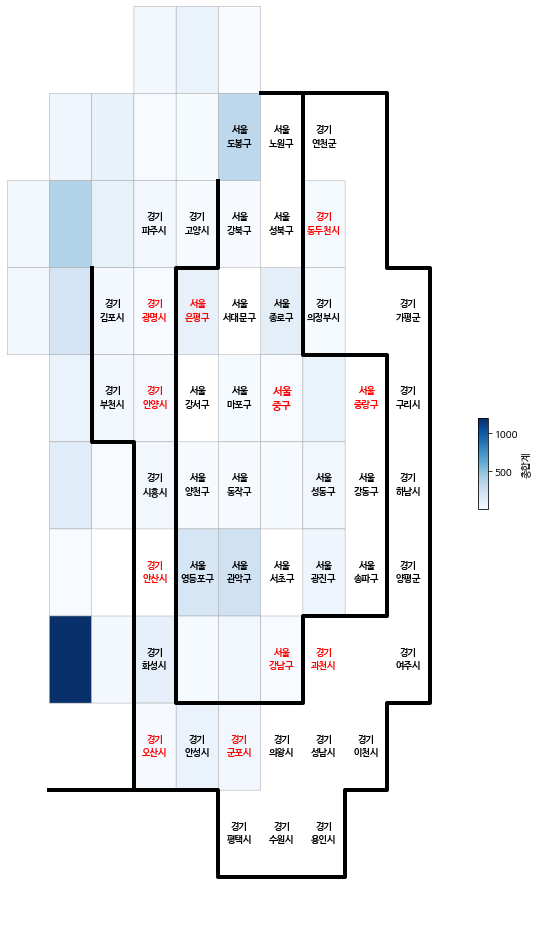

In [ ]:
# 다른사람 코드 참고해서 plot (기대한 대로 깔끔하게 안나옴->R에서 다시 시도!)

BORDER_LINES = [
                [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], #인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)]] # 경기도


blockedMap = new_df
targetData = '총합계'

whitelabelmin = blockedMap[targetData].mean()

datalabel = targetData

vmin = min(blockedMap[targetData])
vmax = max(blockedMap[targetData])

mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

plt.figure(figsize=(8, 13))
plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
for idx, row in blockedMap.iterrows():
    annocolor = 'red' if row[targetData] > whitelabelmin else 'black'
    dispname = '{}\n{}'.format(row['광역시도'][:2], row['행정구역'][:])
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2
    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
        
    # 시도 경계 그린다.
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=4)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

cb = plt.colorbar(shrink=.1, aspect=10)
cb.set_label(datalabel)

plt.tight_layout()
plt.show()

In [ ]:
new_df.to_excel("수도권_지도.xlsx")